# Task2_Clustering_KMeans++,Hierarchy cluster and PCA

In [1]:
# import necessay libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# load and read the dataset
dataset= pd.read_csv("gas turbine Co and Nox emission dataset.csv")
dataset.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [3]:
# finding the number of rows and columns
dataset.shape

(7384, 11)

In [4]:
# getting some informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [5]:
# checking for missing values
dataset.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [7]:
#statistical view
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,7384.0,17.225259,8.095783,-6.2348,11.073250,17.4565,23.684750,37.1030
AP,7384.0,1014.509110,6.895430,989.4000,1009.675000,1014.0000,1018.300000,1036.6000
AH,7384.0,68.647464,13.541116,24.0850,59.447250,70.9520,79.653750,96.6660
AFDP,7384.0,3.598909,0.610226,2.3688,3.117300,3.5385,4.194825,5.2395
GTEP,7384.0,26.130149,4.473737,17.6980,23.147000,25.3310,30.018250,40.7160
TIT,7384.0,1078.974689,19.762449,1016.0000,1070.500000,1080.3000,1099.900000,1100.4000
TAT,7384.0,546.642484,5.489066,516.0400,544.747500,549.7200,550.030000,550.5900
TEY,7384.0,133.993380,16.179208,100.0200,126.255000,131.6000,147.160000,179.5000
CDP,7384.0,12.097025,1.136601,9.8708,11.465750,11.9330,13.148000,15.1590
CO,7384.0,3.129986,2.234962,0.2128,1.808175,2.5334,3.702550,41.0970


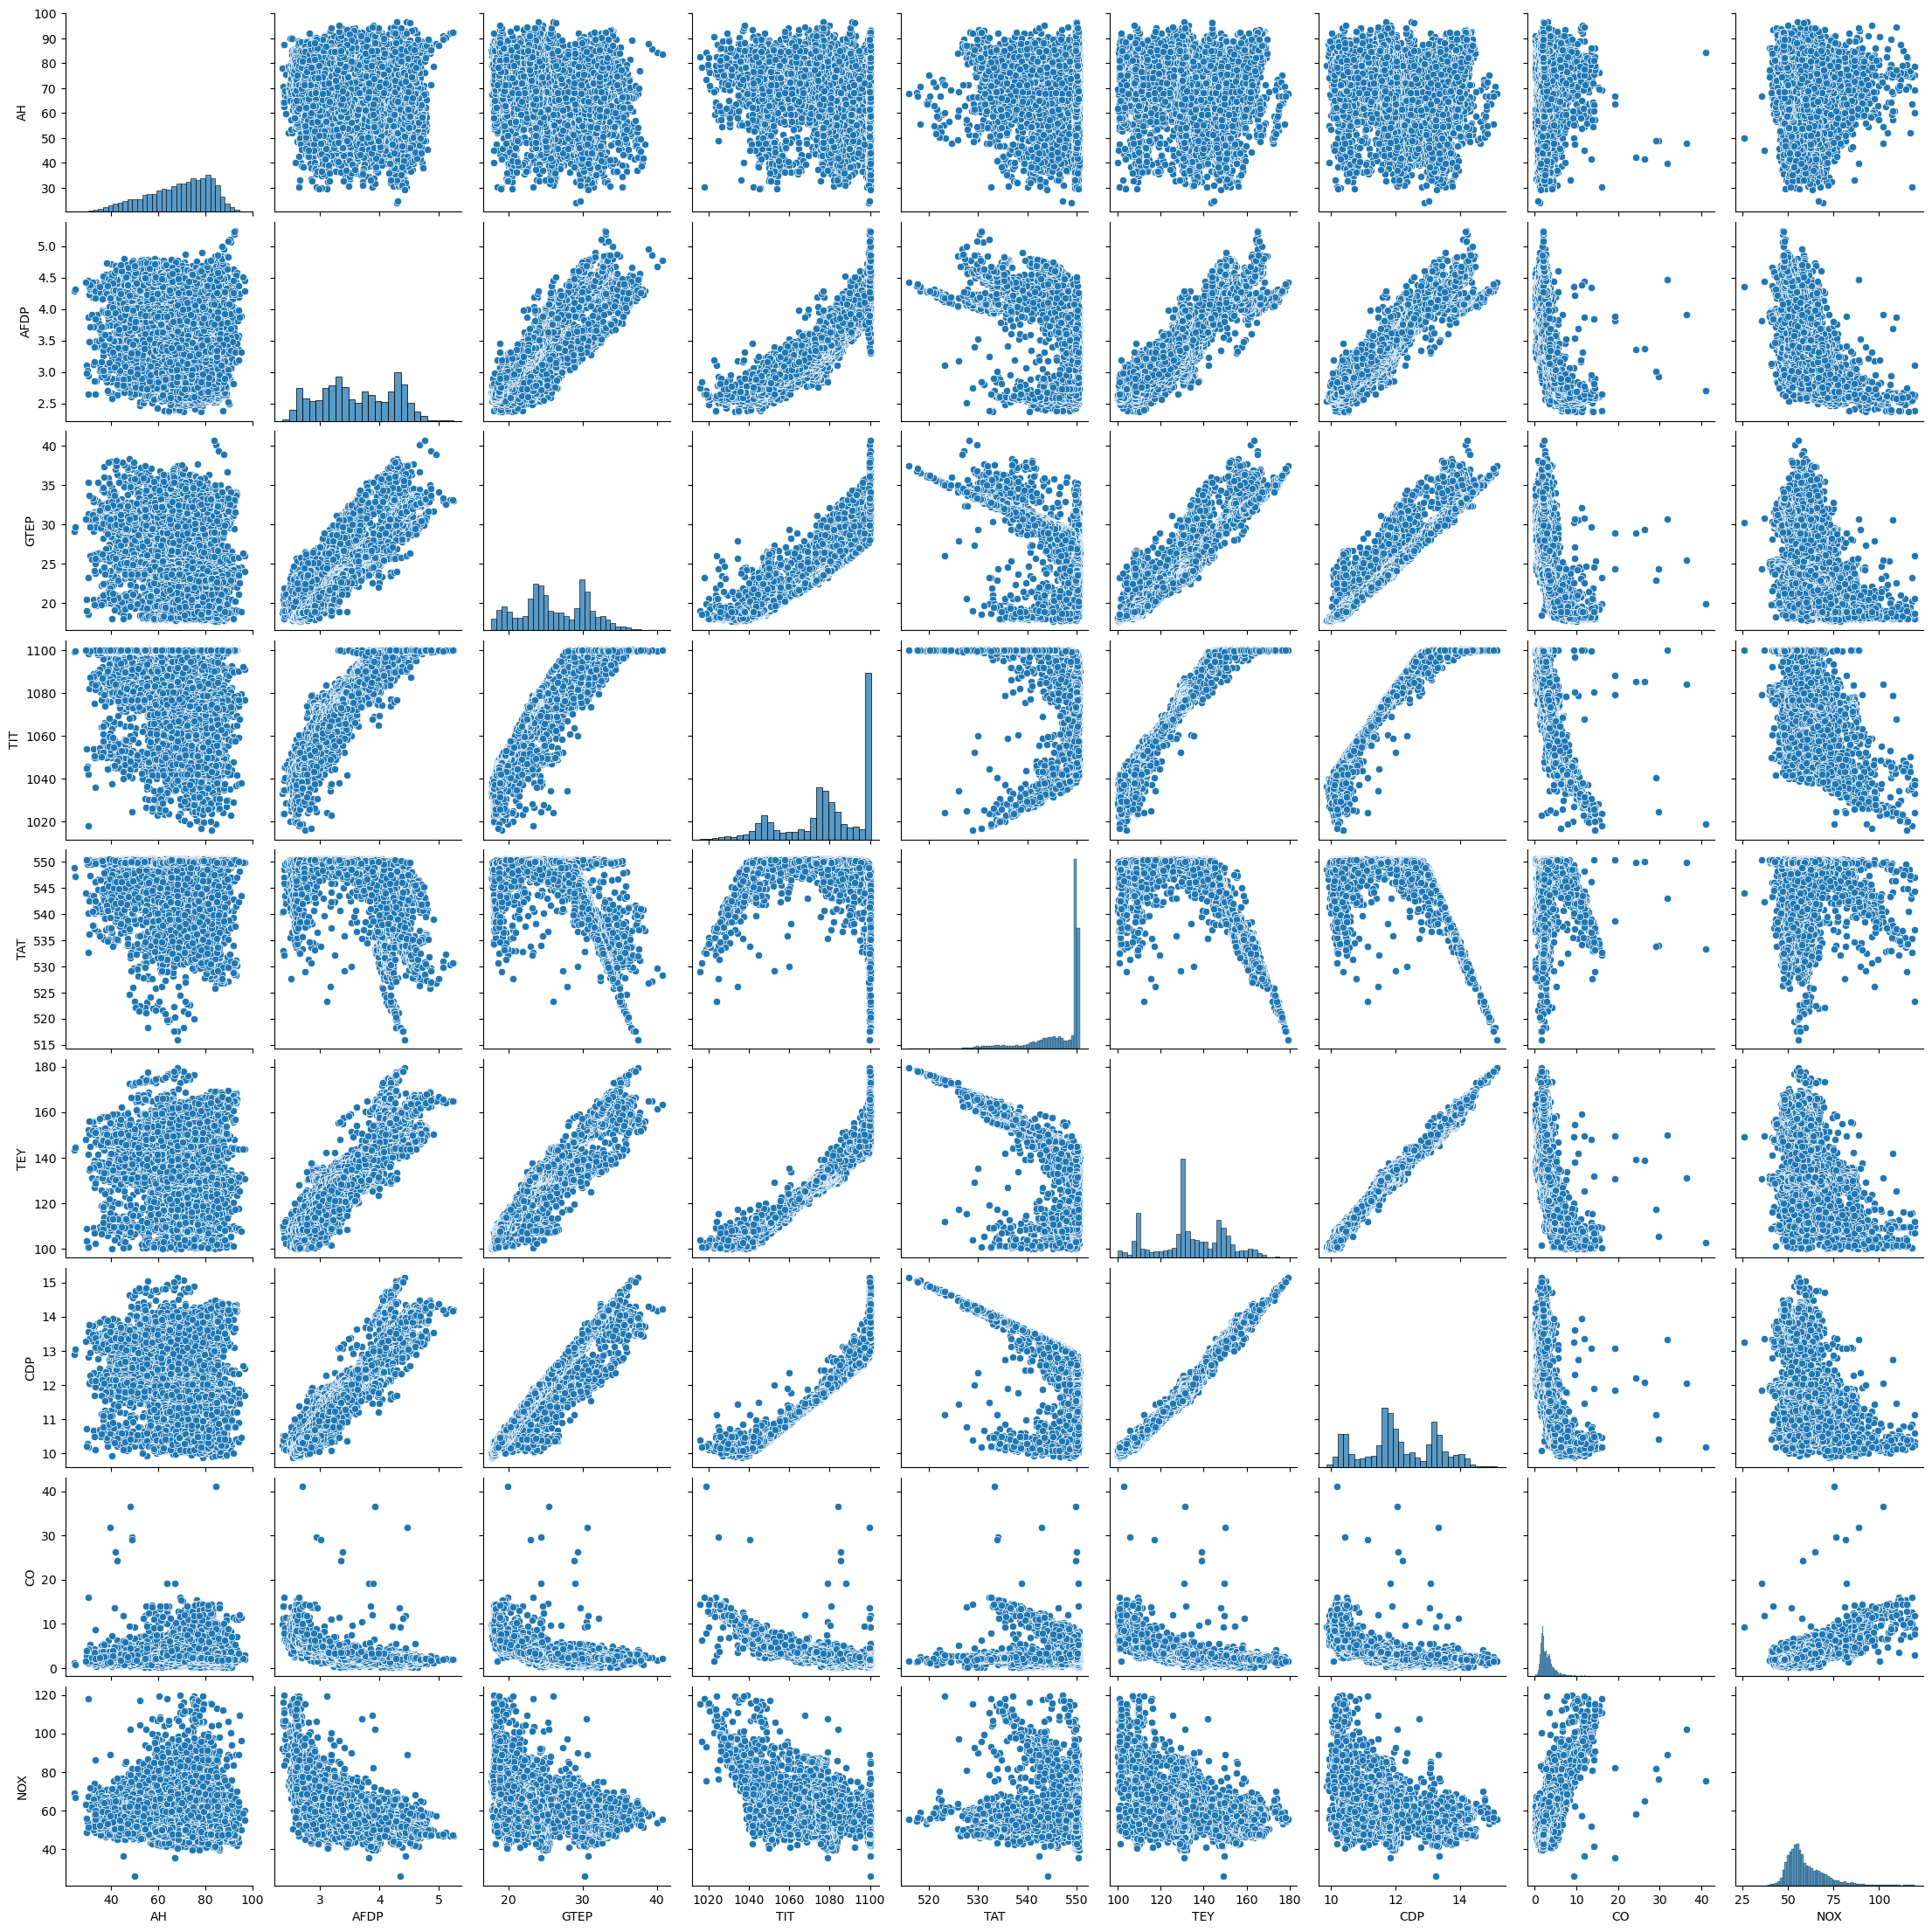

In [8]:
# plot
sns.pairplot(dataset.iloc[:,[2,3,4,5,6,7,8,9,10]])

In [9]:
#standars scalar
from sklearn.preprocessing import StandardScaler
X=dataset.iloc[:,[3,4]].values
sc_X=StandardScaler()
X =sc_X.fit_transform(X)

In [10]:
import warnings
warnings.filterwarnings('ignore')

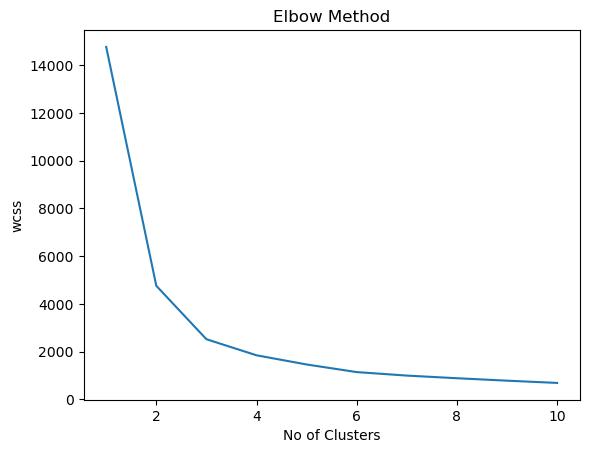

In [11]:
# using a elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init= 'k-means++',random_state =42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

In [12]:
wcss

[14768.0,
 4758.64249828904,
 2519.9967567211,
 1846.2172399525016,
 1461.4170469168282,
 1142.2907776394616,
 995.9905909233448,
 885.2565497458753,
 782.8877554948898,
 688.5623924852712]

In [13]:
# Fitting K-means to the dataset

kmeans =KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [14]:
output = pd.DataFrame(y_kmeans, columns = ['Output'])

In [15]:
newdf=pd.concat([dataset, output], axis = 1)
newdf

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Output
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250,2
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020,2
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147,2
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078,0
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172,2
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849,2
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147,2
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738,3


In [16]:
newdf['Output'].value_counts()

1    2391
0    1963
3    1670
2    1360
Name: Output, dtype: int64

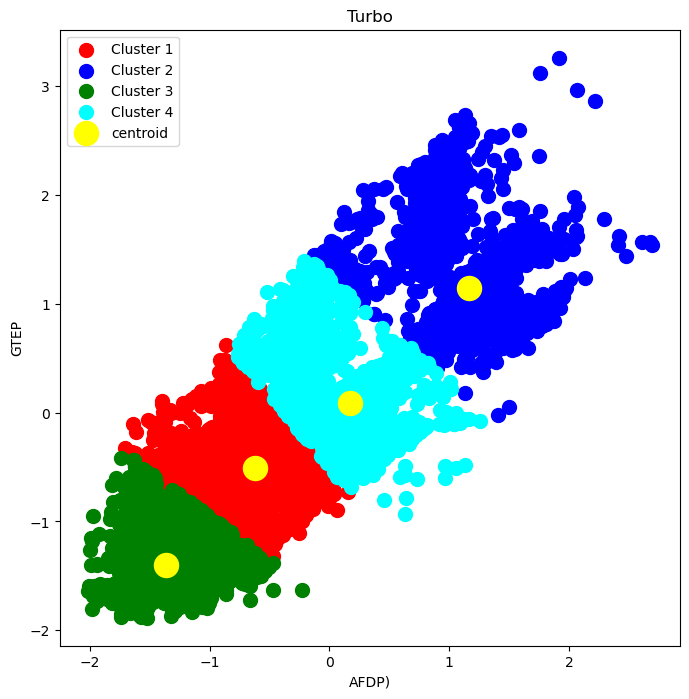

In [17]:
# visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans ==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
#plt.scatter(X[y_kmeans ==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s= 300,c='yellow',label ='centroid' )
plt.title("Turbo")
plt.xlabel("AFDP)")
plt.ylabel("GTEP")
plt.legend()
plt.show()

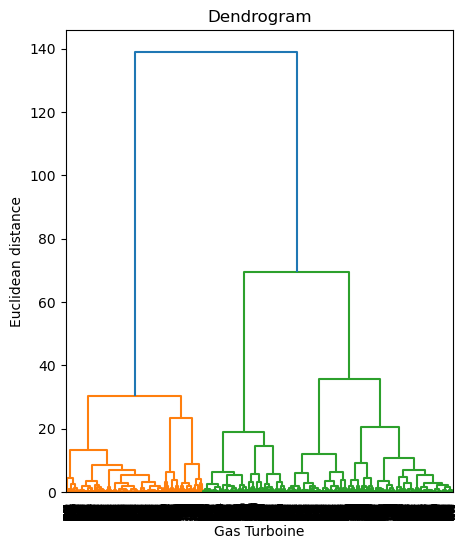

In [25]:
# using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(5,6))
denogram =sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Gas Turboine')
plt.ylabel('Euclidean distance')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters =4,affinity  = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)

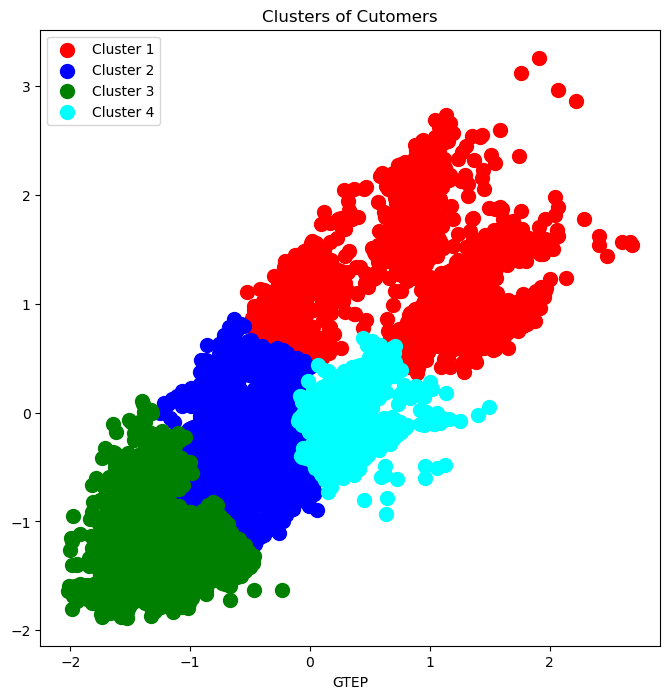

In [26]:
# visualising the Clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0],X[y_hc ==0,1],s= 100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc ==1,1],s= 100,c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc ==2,1],s= 100,c='green',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc ==3,1],s= 100,c='cyan',label='Cluster 4')

plt.title("Clusters of Cutomers")
plt.xlabel("GTEP")
plt.legend()

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92197878, 0.07802122])

In [23]:
sum(pca.explained_variance_ratio_)

1.0

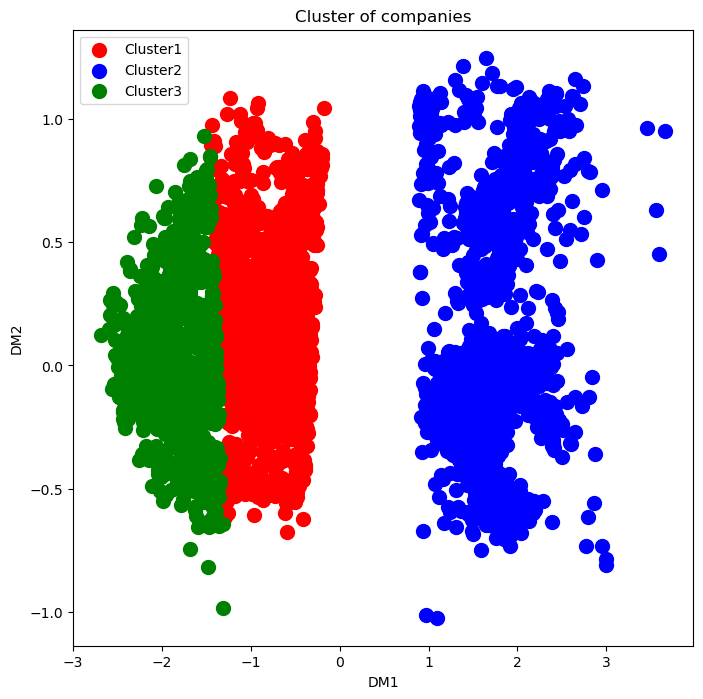

In [24]:
# visualize the clusters

colors=['red','blue','green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans ==i,0],X_reduced[y_kmeans ==i,1],s=100,c=colors[i],label='Cluster'+str(i+1))
plt.title("Cluster of companies")
plt.xlabel("DM1")
plt.ylabel("DM2")
plt.legend()
plt.show()